Epoch 1/10
125/125 [==============================] - 1s 4ms/step - loss: 0.2276 - accuracy: 0.9380 - val_loss: 0.0828 - val_accuracy: 0.9860
Epoch 2/10
125/125 [==============================] - 0s 3ms/step - loss: 0.0711 - accuracy: 0.9852 - val_loss: 0.0459 - val_accuracy: 0.9880
Epoch 3/10
125/125 [==============================] - 0s 3ms/step - loss: 0.0521 - accuracy: 0.9877 - val_loss: 0.0335 - val_accuracy: 0.9930
Epoch 4/10
125/125 [==============================] - 0s 2ms/step - loss: 0.0441 - accuracy: 0.9890 - val_loss: 0.0278 - val_accuracy: 0.9920
Epoch 5/10
125/125 [==============================] - 0s 2ms/step - loss: 0.0395 - accuracy: 0.9900 - val_loss: 0.0244 - val_accuracy: 0.9920
Epoch 6/10
125/125 [==============================] - 0s 2ms/step - loss: 0.0363 - accuracy: 0.9907 - val_loss: 0.0217 - val_accuracy: 0.9930
Epoch 7/10
125/125 [==============================] - 0s 2ms/step - loss: 0.0339 - accuracy: 0.9917 - val_loss: 0.0200 - val_accuracy: 0.9950
Epoch 

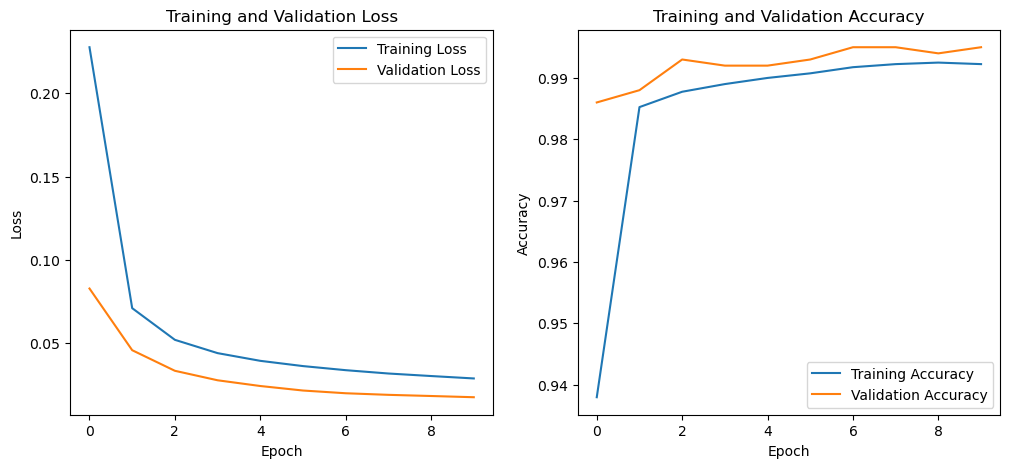

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Load the ECG data
data = pd.read_csv('ecg.csv', header=None)  # Load without headers

# Separate features and labels (assuming last column is the label)
X = data.iloc[:, :-1].values  # All columns except the last as features
y = data.iloc[:, -1].values   # Last column as label

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for input to the neural network (if needed)
# Assuming each row is a flat 1D vector and the model can handle it as such.
# If it's sequential data, additional processing may be needed.

# Define the model
model = Sequential([
    Flatten(input_shape=(X_train.shape[1],)),    # Flatten input
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')               # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Plot the training loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
